<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis/blob/main/Heart_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msn
import plotly.express as px

In [12]:
# load the dataset
heart_analysis = pd.read_csv('/content/heart_analysis_2_cleaned.csv')

In [ ]:
# data exploration
heart_analysis.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
heart_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386196 entries, 0 to 386195
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      386196 non-null  object 
 1   Sex                        386196 non-null  object 
 2   GeneralHealth              386196 non-null  object 
 3   PhysicalHealthDays         386196 non-null  float64
 4   MentalHealthDays           386196 non-null  float64
 5   LastCheckupTime            378935 non-null  object 
 6   PhysicalActivities         386196 non-null  object 
 7   SleepHours                 386196 non-null  float64
 8   RemovedTeeth               386196 non-null  object 
 9   HadHeartAttack             386196 non-null  object 
 10  HadAngina                  386196 non-null  object 
 11  HadStroke                  386196 non-null  object 
 12  HadAsthma                  386196 non-null  object 
 13  HadSkinCancer              38

## **Data Cleaning**

In [ ]:
# cheking missing values
heart_analysis.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,374
PhysicalHealthDays,3618
MentalHealthDays,2915
LastCheckupTime,2682
PhysicalActivities,384
SleepHours,1726
RemovedTeeth,4508
HadHeartAttack,1064


In [ ]:
# percentage of missing values
heart_analysis.isnull().mean()*100

,0
State,0.000000
Sex,0.000000
GeneralHealth,0.265595
PhysicalHealthDays,2.569310
MentalHealthDays,2.070077
LastCheckupTime,1.904613
PhysicalActivities,0.272696
SleepHours,1.225713
RemovedTeeth,3.201341
HadHeartAttack,0.755596


In [ ]:
heart_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140816 entries, 0 to 140815
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      140816 non-null  object 
 1   Sex                        140816 non-null  object 
 2   GeneralHealth              140816 non-null  object 
 3   PhysicalHealthDays         137198 non-null  float64
 4   MentalHealthDays           137901 non-null  float64
 5   LastCheckupTime            140816 non-null  object 
 6   PhysicalActivities         140816 non-null  object 
 7   SleepHours                 139090 non-null  float64
 8   RemovedTeeth               140816 non-null  object 
 9   HadHeartAttack             140816 non-null  object 
 10  HadAngina                  140816 non-null  object 
 11  HadStroke                  140816 non-null  object 
 12  HadAsthma                  140816 non-null  object 
 13  HadSkinCancer              14

## Handling categorical missing data using mode

In [4]:
# List of categorical columns that need missing values replaced with mode
categorical_columns = ['LastCheckupTime', 'GeneralHealth', 'PhysicalActivities',
                       'SmokerStatus', 'RaceEthnicityCategory', 'AgeCategory',
                       'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke',
                       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
                       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
                       'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking',
                       'DifficultyDressingBathing', 'DifficultyErrands', 'ECigaretteUsage',
                       'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
                       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']

# Loop over each categorical column and replace missing values with the mode
for col in categorical_columns:
    mode_value = heart_analysis[col].mode()[0]  # Get the most frequent value (mode)
    heart_analysis[col] = heart_analysis[col].fillna(mode_value)  # Replace missing values with mode

# Check for any remaining missing values in categorical columns
missing_values = heart_analysis[categorical_columns].isnull().sum()
print("Missing values in categorical columns after replacement:")
print(missing_values)


Missing values in categorical columns after replacement:
LastCheckupTime              0
GeneralHealth                0
PhysicalActivities           0
SmokerStatus                 0
RaceEthnicityCategory        0
AgeCategory                  0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
ECigaretteUsage              0
ChestScan                    0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusLast10Tdap            0
HighRiskLastY

# Distibution of non_categorical values

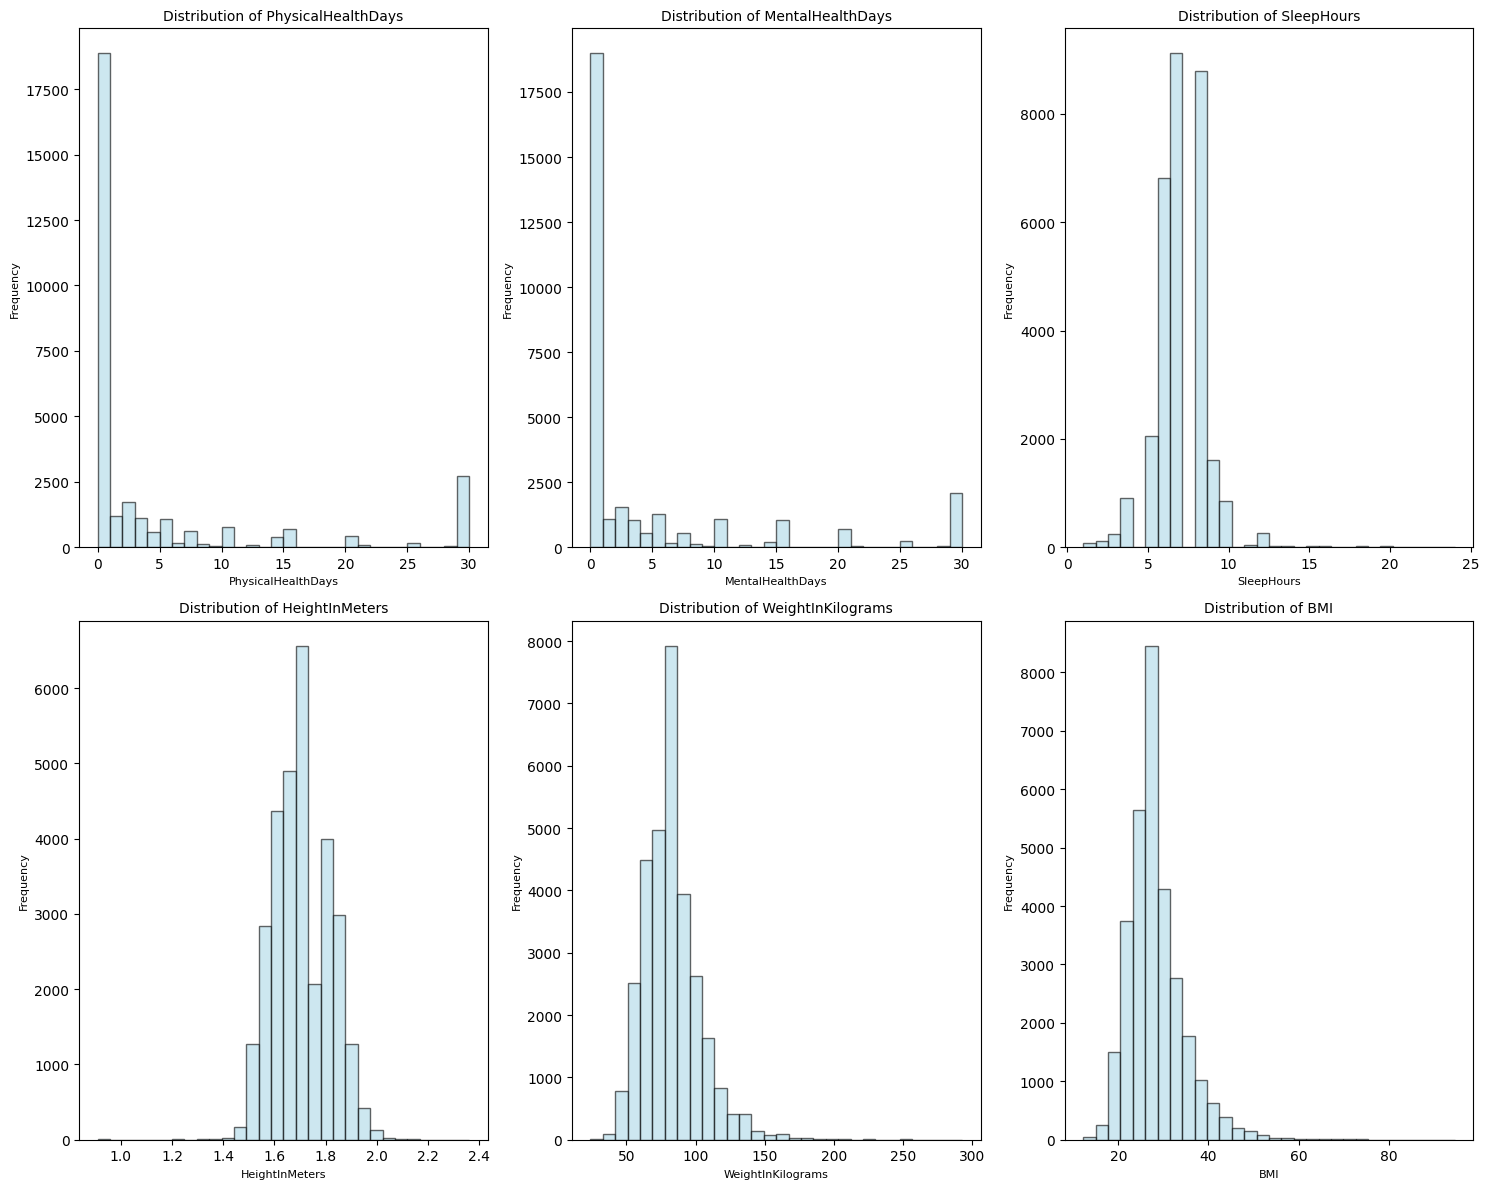

In [ ]:
# List of numeric columns (excluding categorical columns like 'HadHeartAttack', 'HadAngina', etc.)
numeric_columns = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
                   'HeightInMeters', 'WeightInKilograms', 'BMI']

# Convert numeric columns to numeric, coercing errors to NaN
for col in numeric_columns:
    heart_analysis[col] = pd.to_numeric(heart_analysis[col], errors='coerce')

# Set up the figure for plotting
plt.figure(figsize=(15, 12))

# Plot histograms for all numeric columns
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid for plotting (adjust if necessary)
    plt.hist(heart_analysis[col].dropna(), bins=30, edgecolor='black', color='lightblue', alpha=0.6)  # Increase number of bins and reduce alpha for shorter bars
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


## Handling numerical missing values using either mean or median

In [5]:
import pandas as pd

# Assuming heart_analysis is already loaded with your data

# List of columns and their respective treatment based on distribution
skewed_columns = ['PhysicalHealthDays', 'MentalHealthDays']
normal_columns = ['SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

# Replace missing values based on distribution
for col in skewed_columns:
    median_value = heart_analysis[col].median()  # Get the median for skewed data
    heart_analysis[col] = heart_analysis[col].fillna(median_value)  # Replace missing with median

for col in normal_columns:
    mean_value = heart_analysis[col].mean()  # Get the mean for normally distributed data
    heart_analysis[col] = heart_analysis[col].fillna(mean_value)  # Replace missing with mean

# Check if there are still missing values
missing_values = heart_analysis.isnull().sum()
print(missing_values)

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

## Replacing the values on the SmokerStatus column

In [14]:
unique_smoker_status = heart_analysis['PhysicalActivities'].unique()
print("Unique values in PhysicalActivities:\n", unique_smoker_status)

Unique values in PhysicalActivities:
 [0 1]


In [15]:
unique_smoker_status = heart_analysis['AlcoholDrinkers'].unique()
print("Unique values in AlcoholDrinkers:\n", unique_smoker_status)

Unique values in AlcoholDrinkers:
 [0 1]


In [10]:
# Map 'PhysicalActivities' and 'AlcoholDrinkers' to binary values: 1 for 'Yes', 0 for 'No'
heart_analysis['PhysicalActivities'] = heart_analysis['PhysicalActivities'].map({'Yes': 1, 'No': 0})
heart_analysis['AlcoholDrinkers'] = heart_analysis['AlcoholDrinkers'].map({'Yes': 1, 'No': 0})

# Check the updated columns
print(heart_analysis[['PhysicalActivities', 'AlcoholDrinkers']].head())

   PhysicalActivities  AlcoholDrinkers
0                 NaN              NaN
1                 NaN              NaN
2                 NaN              NaN
3                 NaN              NaN
4                 NaN              NaN


In [ ]:
# Step 1: Check for unique values and identify any unexpected ones
unique_smoker_status = heart_analysis['SmokerStatus'].unique()
print("Unique values in SmokerStatus:\n", unique_smoker_status)

Unique values in SmokerStatus:
 ['Never smoked' 'Current smoker - now smokes some days' 'Former smoker'
 'Current smoker - now smokes every day']


In [18]:
# Map SmokerStatus to binary values: 'Yes' for current or former smokers, 'No' for never smoked
heart_analysis['SmokerStatus'] = heart_analysis['SmokerStatus'].map({
    'Never smoked': 0,
    'Current smoker - now smokes some days': 1,
    'Former smoker': 1,
    'Current smoker - now smokes every day': 1
})

# Check the updated SmokerStatus column
print(heart_analysis['SmokerStatus'].value_counts())

SmokerStatus
0    19181
1    11876
Name: count, dtype: int64


In [28]:
#print unique race
unique_race = heart_analysis['RaceEthnicityCategory'].unique()
print("Unique values in RaceEthnicityCategory:\n", unique_race)

Unique values in RaceEthnicityCategory:
 ['White only, Non-Hispanic' 'Black only, Non-Hispanic'
 'Other race only, Non-Hispanic' 'Multiracial, Non-Hispanic' 'Hispanic']


In [ ]:
unique_diabetes_status = heart_analysis['HadDiabetes'].unique()
print("Unique values in HadDiabetes:\n", unique_diabetes_status)

Unique values in HadDiabetes:
 ['Yes' 'No' 'No, pre-diabetes or borderline diabetes'
 'Yes, but only during pregnancy (female)']


In [ ]:
# Map HadDiabetes to binary values: 1 for any form of diabetes, 0 for no diabetes
heart_analysis['HadDiabetes'] = heart_analysis['HadDiabetes'].map({
    'Yes': 1,
    'Yes, but only during pregnancy (female)': 1,
    'No, pre-diabetes or borderline diabetes': 1,
    'No': 0
})

# Check the updated HadDiabetes column
print(heart_analysis['HadDiabetes'].value_counts())

HadDiabetes
0    25400
1     5657
Name: count, dtype: int64


## Grouping the Age Category to Old, Middle Age and Youth

In [40]:
# Define the mapping for age group classification, excluding "Teenager" category
age_group_mapping = {
    'Age 80 or older': 'Very Old',
    'Age 75 to 79': 'Very Old',
    'Age 70 to 74': 'Very Old',
    'Age 65 to 69': 'Old',
    'Age 60 to 64': 'Old',
    'Age 55 to 59': 'Old',
    'Age 50 to 54': 'Middle Age',
    'Age 45 to 49': 'Middle Age',
    'Age 40 to 44': 'Middle Age',
    'Age 35 to 39': 'Youth',
    'Age 30 to 34': 'Youth',
    'Age 25 to 29': 'Youth',
    'Age 18 to 24': 'Youth'  # Group "Teenager" into "Youth"
}

# Apply the mapping to create a new column 'AgeGroup'
AgeCategory = heart_analysis['AgeGroup'] = heart_analysis['AgeCategory'].replace(age_group_mapping)

# Check the updated 'AgeGroup' column
AgeCategory = heart_analysis['AgeGroup'].value_counts()
print(AgeCategory)

AgeGroup
Old           9518
Very Old      8669
Youth         6948
Middle Age    5922
Name: count, dtype: int64


## Converting the 'Yes' to 1 and 'No' to 0 for the medical conditions

In [ ]:
# Convert 'Yes' to 1 and 'No' to 0 in the selected condition columns
heart_analysis['HadHeartAttack'] = heart_analysis['HadHeartAttack'].map({'Yes': 1, 'No': 0})
heart_analysis['HadAngina'] = heart_analysis['HadAngina'].map({'Yes': 1, 'No': 0})
heart_analysis['HadStroke'] = heart_analysis['HadStroke'].map({'Yes': 1, 'No': 0})
heart_analysis['HadAsthma'] = heart_analysis['HadAsthma'].map({'Yes': 1, 'No': 0})
heart_analysis['HadSkinCancer'] = heart_analysis['HadSkinCancer'].map({'Yes': 1, 'No': 0})
heart_analysis['HadCOPD'] = heart_analysis['HadCOPD'].map({'Yes': 1, 'No': 0})
heart_analysis['HadDepressiveDisorder'] = heart_analysis['HadDepressiveDisorder'].map({'Yes': 1, 'No': 0})
heart_analysis['HadKidneyDisease'] = heart_analysis['HadKidneyDisease'].map({'Yes': 1, 'No': 0})
heart_analysis['HadArthritis'] = heart_analysis['HadArthritis'].map({'Yes': 1, 'No': 0})

In [ ]:
# save a copy of the cleaned dataset
heart_analysis_2 = heart_analysis.to_csv('heart_analysis_2_cleaned.csv', index=False)

## **Exploratory Data Analysis (EDA)**

In [ ]:
# Descriptive Statistics
heart_analysis.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,140816.000000,140816.000000,140816.000000,140816.000000,140816.000000,140816.000000
mean,4.298475,4.292438,7.010813,1.702631,82.769622,28.430014
std,8.671444,8.345337,1.512419,0.104264,20.443533,6.180269
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.160000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.390000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,28.250000
75%,3.000000,4.000000,8.000000,1.780000,90.720000,30.910000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.340000


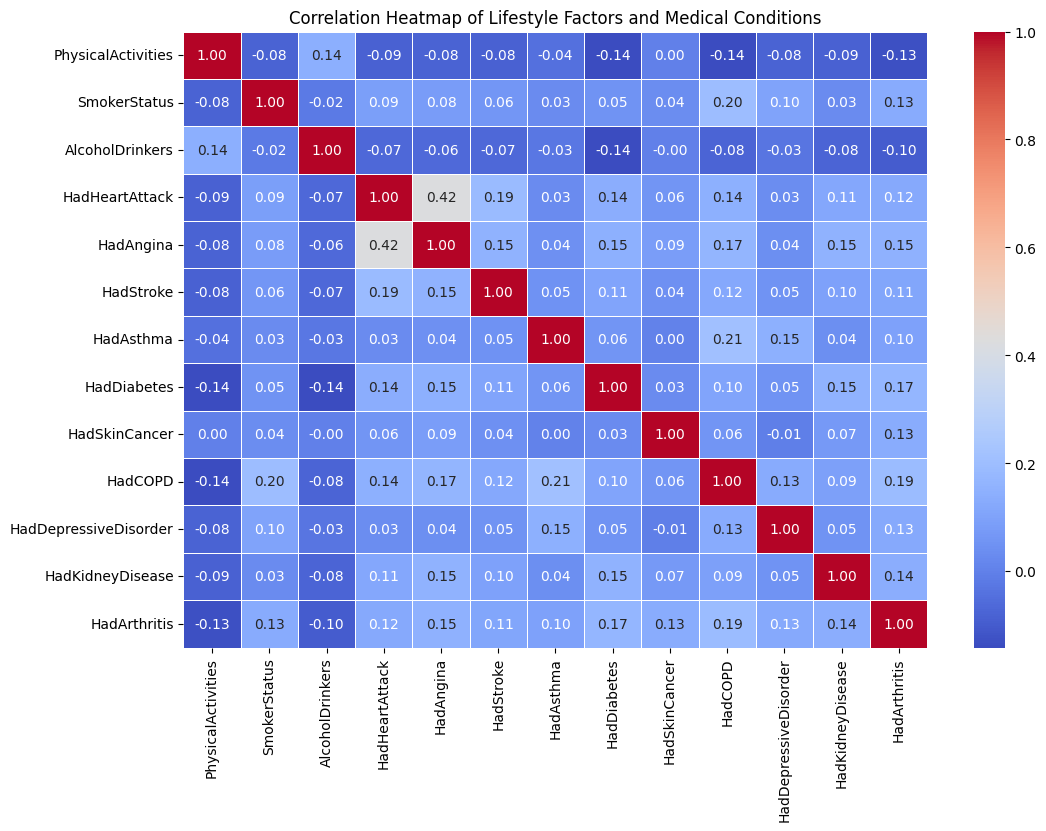

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
columns_of_interest = [
    'PhysicalActivities', 'SmokerStatus', 'AlcoholDrinkers',
    'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
    'HadDiabetes', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
    'HadKidneyDisease', 'HadArthritis'
]

# Filter the dataframe to include only the columns of interest
heart_analysis_filtered = heart_analysis[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = heart_analysis_filtered.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Lifestyle Factors and Medical Conditions')
plt.show()

In [ ]:
# Assuming the dataset has already been preprocessed and cleaned (with binary encoding for conditions and lifestyle factors)

# Define the relevant columns for lifestyle factors and medical conditions
lifestyle_factors = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities']
medical_conditions = ['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadCOPD', 'HadArthritis',
                      'HadKidneyDisease', 'HadSkinCancer', 'HadDepressiveDisorder', 'HadAsthma', 'HadDiabetes']

# Compute the correlation matrix for these columns
correlation_matrix = heart_analysis[lifestyle_factors + medical_conditions].corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Find the highest correlation between lifestyle factors and medical conditions
# Extract the correlations related to 'HadHeartAttack'
heart_attack_corr = correlation_matrix['HadHeartAttack'].sort_values(ascending=False)
print("\nCorrelation with Heart Attack:\n", heart_attack_corr)

# You can similarly find correlations with other conditions like 'HadStroke', 'HadDiabetes', etc.

Correlation Matrix:
                        SmokerStatus  AlcoholDrinkers  PhysicalActivities  \
SmokerStatus               1.000000        -0.003333           -0.072863   
AlcoholDrinkers           -0.003333         1.000000            0.137055   
PhysicalActivities        -0.072863         0.137055            1.000000   
HadHeartAttack             0.088257        -0.064898           -0.086176   
HadAngina                  0.076927        -0.064565           -0.089186   
HadStroke                  0.045048        -0.060849           -0.096885   
HadCOPD                    0.186601        -0.061519           -0.132909   
HadArthritis               0.114603        -0.098280           -0.137683   
HadKidneyDisease           0.020217        -0.074980           -0.086177   
HadSkinCancer              0.021712        -0.008976           -0.014614   
HadDepressiveDisorder      0.100691        -0.028732           -0.080009   
HadAsthma                  0.027033        -0.023131           -0.0

# **Data Analysis**

## Problem Statement

### **What are the key risk factors contributing to the prevalence of heart disease, specifically heart attacks and angina?**

Angina, often experienced as chest pain or discomfort, is a symptom of an underlying heart condition. It occurs when the heart muscle does not receive sufficient oxygen-rich blood, often due to narrowed arteries supplying blood to the heart. This restricted blood flow is commonly associated with cardiovascular disease and can lead to more severe conditions, including heart attacks.

### Key Risk Factors for Heart Disease

- **Lifestyle Habits**: Smoking, physical inactivity, and excessive alcohol consumption are known to strain cardiovascular health, contributing significantly to heart disease risk.
  
- **Medical Conditions**: High blood pressure, elevated cholesterol levels, high blood sugar or diabetes, and obesity increase the likelihood of arterial plaque buildup, which restricts blood flow and heightens heart disease risk.

- **Demographic Factors**: Family history, age, sex, and race/ethnicity are non-modifiable risk factors that also influence the prevalence of heart disease.

This analysis aims to identify the influence and correlation of these factors with the prevalence of heart disease, particularly focusing on heart attacks and angina, to inform prevention and intervention strategies.




## Correlation between Heart Conditions and Contributing Factors

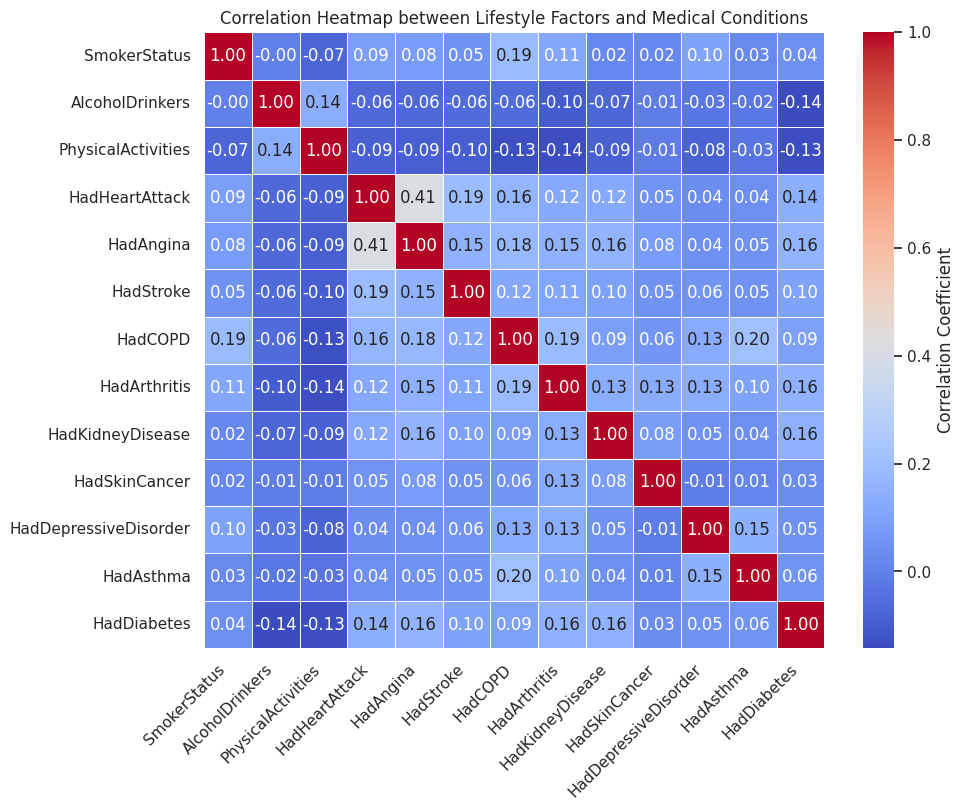

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size and style
plt.figure(figsize=(10, 8))
sns.set(style="white")

# Create the heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})

# Add labels and title
plt.title("Correlation Heatmap between Lifestyle Factors and Medical Conditions")
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.yticks(rotation=0)  # Keep y labels horizontal

# Show the heatmap
plt.show()

Lifestyle Factors and Heart Disease:

Smoker Status has a mild positive correlation (0.088) with heart attacks, suggesting that smoking may contribute to heart disease, though the relationship here is not particularly strong in this dataset. However, smoking has a higher correlation with other respiratory conditions like COPD (0.19), indicating a stronger direct impact on lung health.
Alcohol Consumption has a slight negative correlation with heart attacks (-0.065) and other heart conditions, suggesting that, within this dataset, alcohol consumption may not be a significant independent risk factor or may have complex associations not directly captured here.
Physical Activity shows a mild negative correlation with heart attacks (-0.086), angina (-0.089), and stroke (-0.096). This aligns with the understanding that physical activity can reduce the risk of cardiovascular disease.

## Prevalence of Other Chronic Conditions in People with Heart Attack'

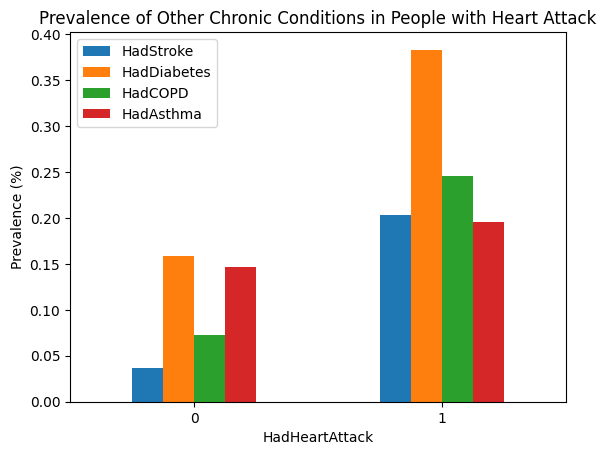

In [ ]:
# Group by 'HadHeartAttack' and calculate the mean for the selected conditions
heart_analysis.groupby('HadHeartAttack')[['HadStroke', 'HadDiabetes', 'HadCOPD', 'HadAsthma']].mean().plot(kind='bar')

# Adding title and labels to the plot
plt.title('Prevalence of Other Chronic Conditions in People with Heart Attack')
plt.ylabel('Prevalence (%)')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal
plt.show()

### 1. Diabetes and Heart Disease:
- Prevalence and Impact: Diabetes is a leading risk factor for heart disease, particularly type 2 diabetes. It contributes to heart disease in several ways:
- Atherosclerosis: High blood sugar levels can lead to the hardening of arteries, which is a major cause of heart attacks and strokes.
- Insulin Resistance: In type 2 diabetes, insulin resistance promotes fat accumulation in the bloodstream, leading to increased cholesterol and higher risk of cardiovascular events.
- Inflammation: Chronic high blood sugar leads to increased inflammation, which accelerates the buildup of plaque in the arteries, further increasing the risk of heart disease.
- Statistics: According to the American Diabetes Association, people with diabetes are 2-4 times more likely to have a heart attack than those without diabetes. This increased risk is one of the key drivers behind heart disease prevalence in the United States.

### 2. COPD (Chronic Obstructive Pulmonary Disease) and Heart Disease:
- Prevalence and Impact: COPD significantly increases the risk of heart disease, especially for individuals who smoke, as both COPD and heart disease share common risk factors.
- Oxygen Deprivation: In COPD, the reduced oxygen levels strain the heart and increase the risk of cardiovascular events like heart attacks.
- Inflammation: Chronic inflammation in the lungs in COPD patients also promotes inflammation in blood vessels, contributing to the development of heart disease.
- Shared Risk Factors: Smoking is a common risk factor for both COPD and heart disease, which exacerbates the overall health risk for these patients.
Statistics: People with COPD are more likely to die from heart disease than from lung disease itself. This is because of the strain COPD puts on the heart and the higher risk of atherosclerosis in these patients.

### 3. Stroke and Heart Disease:
- Prevalence and Impact: A stroke can either be caused by a clot blocking a blood vessel in the brain (ischemic stroke) or by a ruptured blood vessel (hemorrhagic stroke). Stroke risk is closely linked to heart disease.
- Atherosclerosis: Many of the same risk factors that cause heart attacks—such as high blood pressure, high cholesterol, diabetes, and smoking—also increase the likelihood of having a stroke.
- Heart Attack and Stroke Connection: People who have had a heart attack are 2-4 times more likely to experience a stroke, as both conditions share the same underlying causes of artery plaque buildup.
Statistics: In the U.S., stroke is the fifth leading cause of death, and people with heart disease are more likely to experience a stroke. Additionally, stroke can increase the risk of having another heart attack.

### 4. Asthma and Heart Disease:
- Prevalence and Impact: While asthma is primarily a lung condition, there are important cardiovascular connections:
- Stress on the Heart: Severe asthma attacks can place a lot of stress on the heart due to increased demand for oxygen during breathing difficulties.
- Shared Risk Factors: Many people with asthma also have other cardiovascular risk factors, such as obesity or high blood pressure, which further increase their heart disease risk.
- Inflammation: Asthma is associated with chronic inflammation, which can also impact the cardiovascular system by contributing to the development of plaque in arteries.
Statistics: While asthma is less directly associated with heart disease than conditions like diabetes or COPD, severe asthma attacks and the medications used for asthma (such as beta-agonists) can increase the heart’s workload, especially in people with existing heart conditions.

## The Role of Lifestyle Habits in Shaping Cardiovascular Health

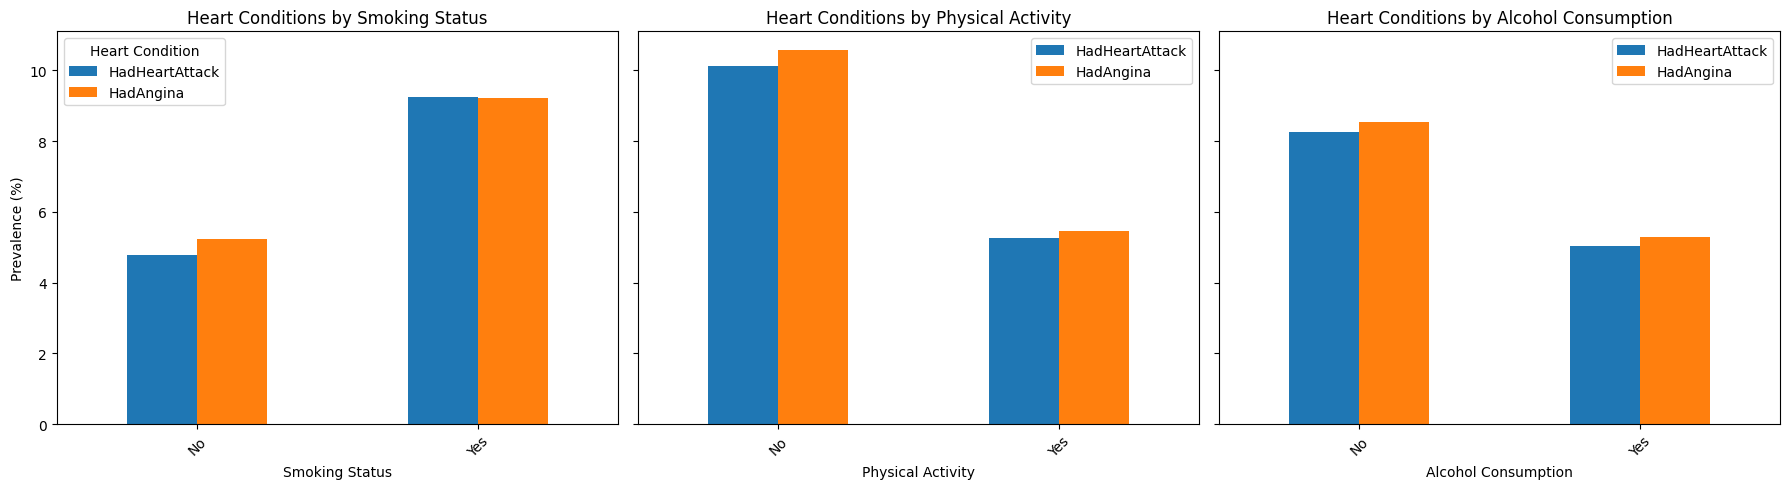

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map 0 and 1 to 'No' and 'Yes' for better readability
heart_analysis['SmokerStatus'] = heart_analysis['SmokerStatus'].map({0: 'No', 1: 'Yes'})
heart_analysis['PhysicalActivities'] = heart_analysis['PhysicalActivities'].map({0: 'No', 1: 'Yes'})
heart_analysis['AlcoholDrinkers'] = heart_analysis['AlcoholDrinkers'].map({0: 'No', 1: 'Yes'})

# Create a 1x3 grid for the bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# 1. Grouped Bar Chart: Prevalence of heart conditions by smoking status
smoking_heart_conditions = heart_analysis.groupby('SmokerStatus')[['HadHeartAttack', 'HadAngina']].mean() * 100
smoking_heart_conditions.plot(kind='bar', stacked=False, ax=axes[0], color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Heart Conditions by Smoking Status')
axes[0].set_ylabel('Prevalence (%)')
axes[0].set_xlabel('Smoking Status')
axes[0].legend(title='Heart Condition')
axes[0].set_xticklabels(['No', 'Yes'], rotation=45)

# 2. Grouped Bar Chart: Prevalence of heart conditions by physical activity levels
physical_activity_heart_conditions = heart_analysis.groupby('PhysicalActivities')[['HadHeartAttack', 'HadAngina']].mean() * 100
physical_activity_heart_conditions.plot(kind='bar', stacked=False, ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Heart Conditions by Physical Activity')
axes[1].set_xlabel('Physical Activity')
axes[1].set_xticklabels(['No', 'Yes'], rotation=45)

# 3. Grouped Bar Chart: Prevalence of heart conditions by alcohol consumption
alcohol_heart_conditions = heart_analysis.groupby('AlcoholDrinkers')[['HadHeartAttack', 'HadAngina']].mean() * 100
alcohol_heart_conditions.plot(kind='bar', stacked=False, ax=axes[2], color=['#1f77b4', '#ff7f0e'])
axes[2].set_title('Heart Conditions by Alcohol Consumption')
axes[2].set_xlabel('Alcohol Consumption')
axes[2].set_xticklabels(['No', 'Yes'], rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### **1. Smoking Status: Higher Prevalence of Heart Conditions in Smokers**

- Insight: The increased prevalence of heart conditions among smokers reflects the well-established link between smoking and cardiovascular disease. According to the CDC, smoking damages blood vessels, leading to plaque buildup in the arteries, which increases the risk of heart attacks and angina. Smokers in the U.S. have a 2–4 times higher risk of developing heart disease than non-smokers.

### **2. Physical Activity: Higher Prevalence of Heart Conditions in Inactive Individuals**

- Insight: The higher prevalence of heart conditions among individuals with low physical activity aligns with research showing the importance of regular exercise for cardiovascular health. Physical inactivity is a significant risk factor for heart disease, as it contributes to conditions like obesity, high blood pressure, and high cholesterol, all of which elevate the risk for heart attacks and angina.
- Fact: The U.S. Department of Health and Human Services recommends at least 150 minutes of moderate aerobic activity weekly, but according to the CDC, only about 23% of U.S. adults meet this guideline. Physical inactivity contributes to approximately 11% of heart disease cases, emphasizing the need for regular exercise.

### **3. Alcohol Consumption: Lower Prevalence of Heart Conditions in Moderate Drinkers**

- Insight: The lower prevalence of heart conditions among those who consume alcohol, likely in moderate amounts, suggests a potential protective effect associated with moderate alcohol consumption, particularly with beverages like red wine. Moderate alcohol intake has been linked with a modest reduction in heart disease risk due to its impact on HDL (good cholesterol) levels and antioxidant properties, which may help reduce artery plaque buildup.

## Demographic Factors influencing Heart condtions

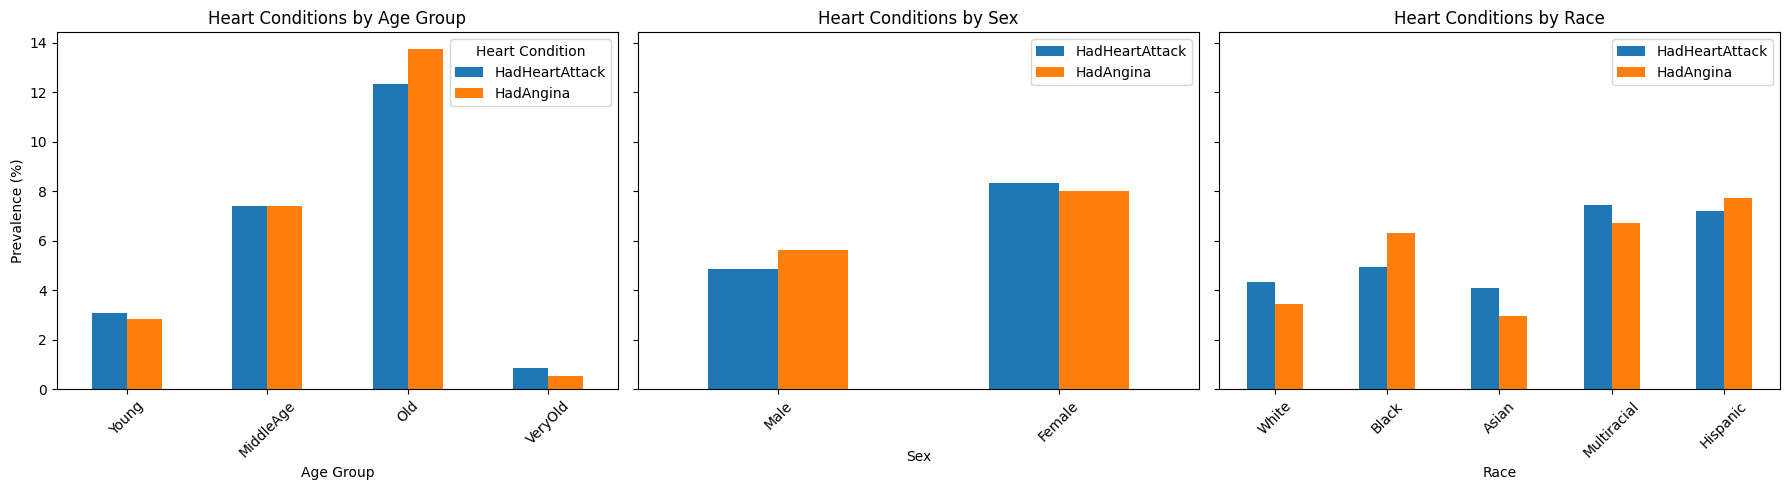

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Update the RaceEthnicityCategory values to a simplified version
race_mapping = {
    'White only, Non-Hispanic': 'White',
    'Black only, Non-Hispanic': 'Black',
    'Other race only, Non-Hispanic': 'Asian',
    'Multiracial, Non-Hispanic': 'Multiracial',
    'Hispanic': 'Hispanic'
}

# Apply the mapping to the RaceEthnicityCategory column
heart_analysis['Race'] = heart_analysis['RaceEthnicityCategory'].map(race_mapping)

# Create a 1x3 grid for the bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# 1. Grouped Bar Chart: Prevalence of heart conditions by AgeGroup
age_group_heart_conditions = heart_analysis.groupby('AgeGroup')[['HadHeartAttack', 'HadAngina']].mean() * 100
age_group_heart_conditions.plot(kind='bar', stacked=False, ax=axes[0], color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Heart Conditions by Age Group')
axes[0].set_ylabel('Prevalence (%)')
axes[0].set_xlabel('Age Group')
axes[0].legend(title='Heart Condition')
axes[0].set_xticklabels(['Young', 'MiddleAge', 'Old', 'VeryOld'], rotation=45)

# 2. Grouped Bar Chart: Prevalence of heart conditions by Sex
sex_heart_conditions = heart_analysis.groupby('Sex')[['HadHeartAttack', 'HadAngina']].mean() * 100
sex_heart_conditions.plot(kind='bar', stacked=False, ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Heart Conditions by Sex')
axes[1].set_xlabel('Sex')
axes[1].set_xticklabels(['Male', 'Female'], rotation=45)

# 3. Grouped Bar Chart: Prevalence of heart conditions by Race (Updated categories)
race_heart_conditions = heart_analysis.groupby('Race')[['HadHeartAttack', 'HadAngina']].mean() * 100
race_heart_conditions.plot(kind='bar', stacked=False, ax=axes[2], color=['#1f77b4', '#ff7f0e'])
axes[2].set_title('Heart Conditions by Race')
axes[2].set_xlabel('Race')
axes[2].set_xticklabels(['White', 'Black', 'Asian', 'Multiracial', 'Hispanic'], rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### **1. Age Group (Old, Middle-Aged, and Young)**
- Old individuals lead in terms of heart disease prevalence, followed by Middle-Aged and Young individuals.
-Insight: In the United States, heart disease risk increases significantly with age, and older adults (typically 65 and above) are more likely to suffer from cardiovascular conditions. As people age, they accumulate more risk factors such as high blood pressure, high cholesterol, and diabetes, which contribute to a higher prevalence of heart disease. According to the CDC, heart disease is the leading cause of death among older adults in the U.S. For those aged 65 and older, the risk of heart disease is compounded by the natural aging process, which includes the stiffening of the arteries, decreased heart function, and an increased likelihood of developing comorbidities such as diabetes and kidney disease.
### **2. Sex (Females vs. Males)**
- Females are leading in terms of heart disease prevalence, followed by Males.
- Insight: While heart disease is often perceived as more common in men, it is the leading cause of death for women in the U.S. as well. According to the American Heart Association (AHA), women tend to develop heart disease later than men, but when they do, the risk is more severe. This can be attributed to factors like hormonal changes after menopause, which increase the risk of cardiovascular diseases. Additionally, women often have different symptoms than men, leading to underdiagnosis or delayed diagnosis of heart disease.
### **3. Race (Hispanic, Multiracial, Black, White, and Asian)**
- Black and Hispanic adults in the United States have a higher risk of heart disease than white adults:
 - Black men have a 70% higher risk of heart failure compared with white men.
 - Black women have a 50% higher risk of heart failure compared with white women.
 - Black adults are more than twice as likely as white adults to be hospitalized for heart failure. They also spend longer in the hospital and are more likely to be admitted again within 90 days.
 - Hispanic adults are more likely than white adults to have heart failure.
 - Asian adults are less likely than other groups to have coronary artery disease. But there are some differences by ethnicity. Asian Indian men, Filipino men and Filipino women have a higher risk compared with white people.

## Percentage of People with Medical Conditions by State

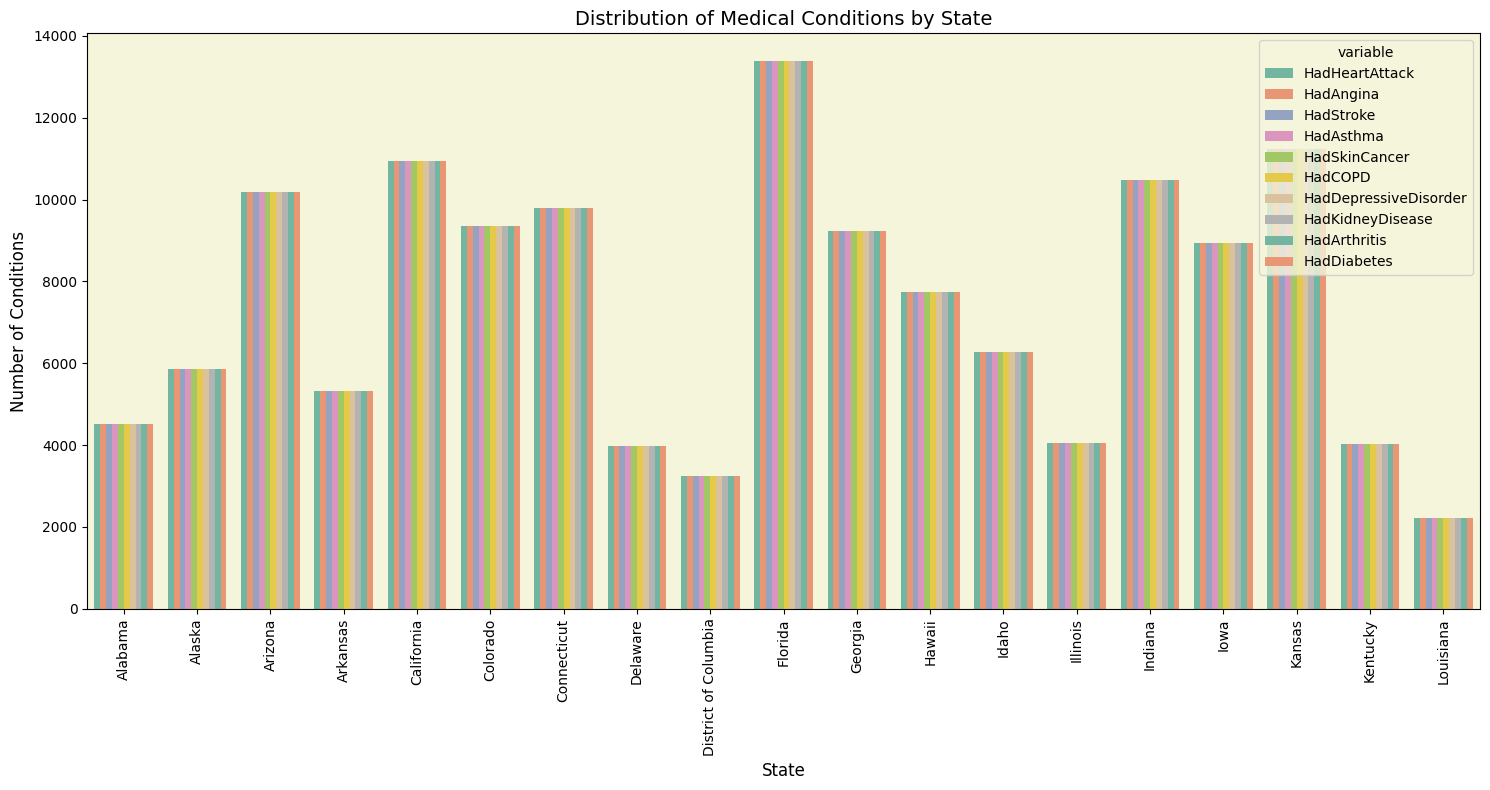

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter dataset to include only relevant columns
state_condition_data = heart_analysis[['State', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes']]

# Melt the data to make it easier to plot
state_condition_data_melted = state_condition_data.melt(id_vars=['State'], value_vars=['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes'])

# Calculate the total number of conditions per state
condition_counts_per_state = state_condition_data_melted.groupby('State')['value'].sum().reset_index()

# Sort the states by the total number of conditions in descending order
sorted_condition_counts = condition_counts_per_state.sort_values(by='value', ascending=False)

# Filter the data to show all states (sorted by the number of conditions)
sorted_state_condition_data = state_condition_data_melted[state_condition_data_melted['State'].isin(sorted_condition_counts['State'])]

# Create a countplot to show the number of occurrences of medical conditions for all states (sorted)
plt.figure(figsize=(15, 8))
sns.countplot(x='State', hue='variable', data=sorted_state_condition_data, palette='Set2')

# Add title and labels
plt.title('Distribution of Medical Conditions by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Conditions', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Summary of Insights on Chronic Medical Conditions in Florida**
- Aging Population: Florida has one of the highest percentages of residents aged 65 and older in the U.S., which significantly contributes to the state's higher rates of chronic medical conditions. Older adults are more susceptible to diseases like heart disease, diabetes, arthritis, and stroke. This age group typically experiences a higher incidence of chronic health issues.

- Lifestyle Factors: High prevalence of smoking, alcohol consumption, and poor diet are key lifestyle factors contributing to chronic medical conditions in Florida. These behaviors increase the risk of conditions like COPD, cancer, and cardiovascular disease. Lifestyle-related diseases are common in many populations and are likely influencing the health outcomes in the state.

- Climate and Environmental Factors: Florida's warm climate may exacerbate certain health conditions, especially respiratory diseases (COPD) and skin cancer due to prolonged sun exposure. The humid environment could also contribute to health problems like asthma and heart conditions, as high temperatures can stress the cardiovascular system.

## Age Distribution By States

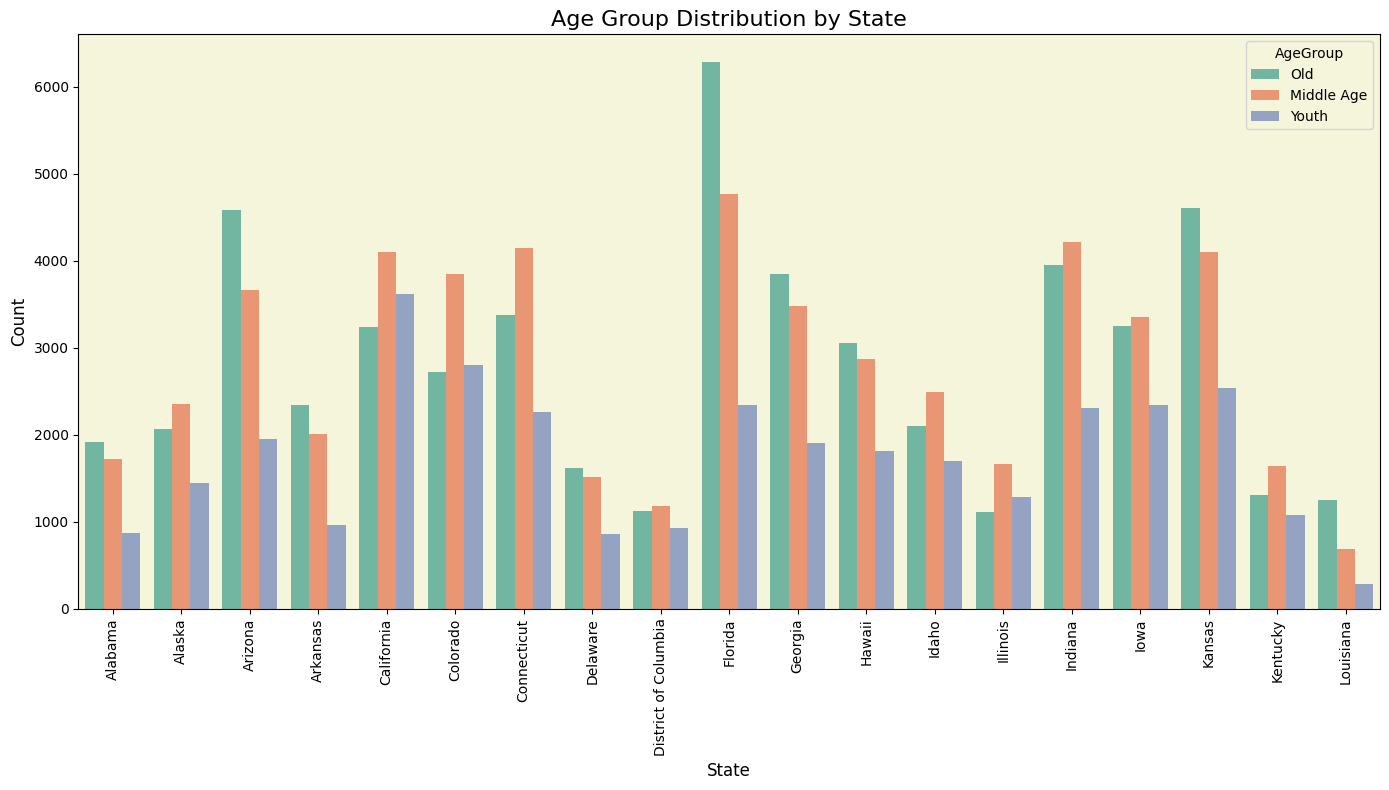

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `heart_analysis` with the columns 'States' and 'AgeGroup'
# Create a count plot to visualize the distribution of AgeGroup by state
plt.figure(figsize=(14, 8))
sns.countplot(data=heart_analysis, x='State', hue='AgeGroup', palette='Set2')

# Customize the plot
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.title('Age Group Distribution by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Florida’s Senior Population is Growing Rapidly
- Largest Percentage of Seniors: Florida is home to the highest percentage of seniors in the country. According to the U.S. Census Bureau, more than 20% of Florida’s population is 65 years or older, a higher percentage than any other state. In some counties, the percentage is even higher, with over 30% of residents being seniors.

## Florida is a Retirement Destination
- Popular Among Retirees: Florida has long been a popular destination for retirees. The state’s warm climate, no state income tax, and relatively affordable cost of living make it an attractive place for older adults to live. It’s often referred to as a “retirement haven” or the “Sunshine State” for its appeal to those looking to enjoy their later years.

#Alcohol and Smoking Usage By States

<ipython-input-64-8c828f7da2ce>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-64-8c828f7da2ce>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




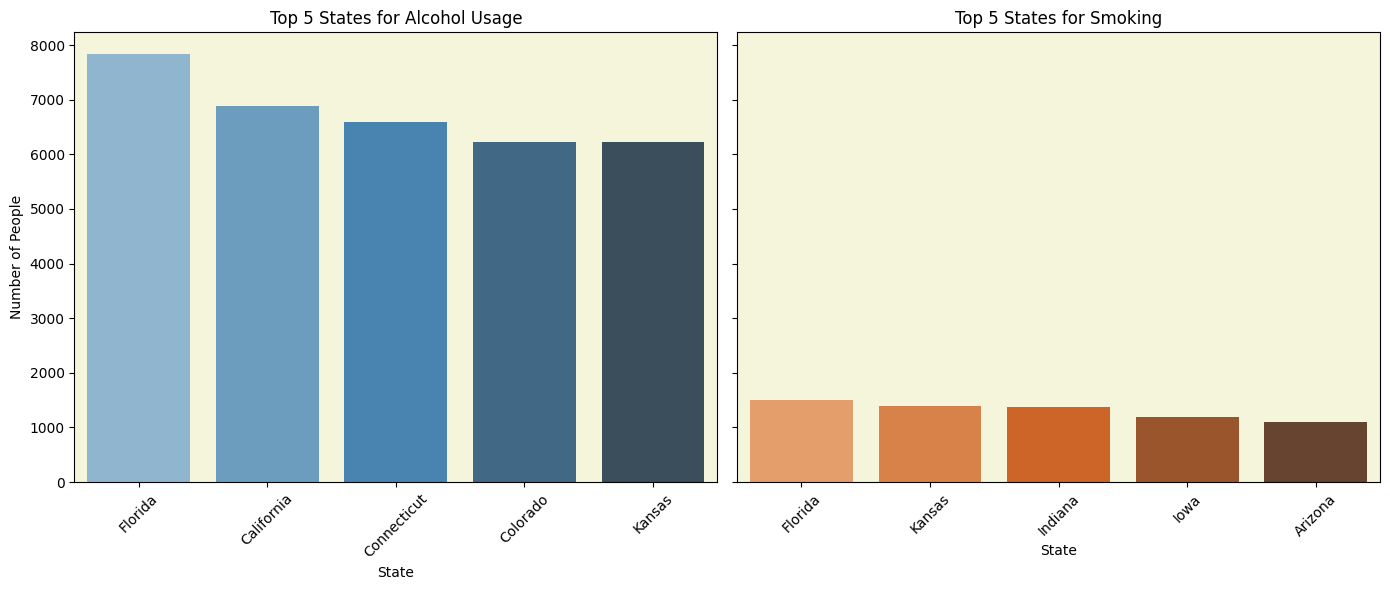

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for individuals who consume alcohol and those who are current smokers
alcohol_users = heart_analysis[heart_analysis['AlcoholDrinkers'] == 'Yes']
smokers = heart_analysis[heart_analysis['SmokerStatus'] == 'Current Smoker']

# Count alcohol users and smokers in each state and get the top 5
state_alcohol_counts = alcohol_users['State'].value_counts().nlargest(5)
state_smoker_counts = smokers['State'].value_counts().nlargest(5)

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Alcohol Usage
sns.barplot(x=state_alcohol_counts.index, y=state_alcohol_counts.values, ax=axes[0], palette="Blues_d")
axes[0].set_title('Top 5 States for Alcohol Usage')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Number of People')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Smoking
sns.barplot(x=state_smoker_counts.index, y=state_smoker_counts.values, ax=axes[1], palette="Oranges_d")
axes[1].set_title('Top 5 States for Smoking')
axes[1].set_xlabel('State')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## **Florida's Drinking Culture**
- Popular Alcohol Consumption: Florida is known for its vibrant nightlife, especially in cities like **Miami**, **Tampa**, and **Orlando**, which attract both tourists and residents. The state's tourism industry fuels the consumption of alcoholic beverages, with visitors flocking to beaches, bars, and restaurants where alcohol is a central part of the experience.
- Beverage Preferences: Florida's warm climate makes cocktails like **Mojitos**, **Pina Coladas**, and **Margaritas** particularly popular, with many served in beachside bars or resorts. Florida is also a major producer of citrus, so citrus-based drinks like screwdrivers (vodka and orange juice) are a favorite.

## **E-Cigarette Use and Smoking Alternatives**

- Rise of Vaping: In recent years, vaping has become more popular in Florida, especially among young people. Although there are concerns about the long-term effects of e-cigarettes, they have become an alternative to traditional smoking. This trend has raised new challenges for tobacco control programs in the state

## **Alcohol and Smoking Correlation**

- Co-occurrence: Studies have shown that smoking and drinking often occur together, especially in social settings. Florida’s vibrant nightlife culture and tourism industry contribute to this overlap, where people tend to engage in both activities, leading to an increased risk of chronic diseases like liver cirrhosis, heart disease, and lung cancer.




## Prevalence of Chronic Diseases in Florida

<ipython-input-94-7ef81f48aefa>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




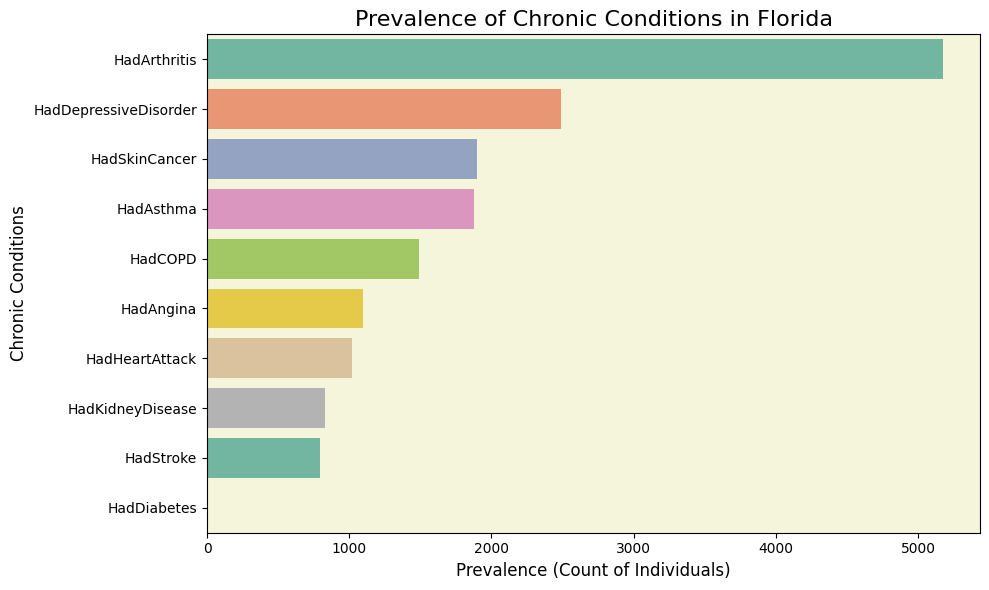

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the heart_analysis dataframe for Florida (assuming a 'State' column exists)
florida_data = heart_analysis[heart_analysis['State'] == 'Florida']

# List of chronic conditions present in your heart_analysis dataframe
conditions = ['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
              'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
              'HadKidneyDisease', 'HadArthritis', 'HadDiabetes']

# Create a dictionary to store the prevalence of each condition for Florida
condition_prevalence_florida = {}

# Loop through each condition to calculate the prevalence for Florida
for condition in conditions:
    condition_prevalence_florida[condition] = florida_data[condition].sum()  # Summing up the 1's gives the count of individuals with the condition

# Convert the dictionary into a DataFrame for easier analysis
prevalence_df_florida = pd.DataFrame(list(condition_prevalence_florida.items()), columns=['Condition', 'Prevalence'])

# Sort the DataFrame by the 'Prevalence' column in descending order to find the most common condition
prevalence_df_florida = prevalence_df_florida.sort_values(by='Prevalence', ascending=False)

# Visualize the data using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Prevalence', y='Condition', data=prevalence_df_florida, palette='Set2')

# Add titles and labels
plt.title('Prevalence of Chronic Conditions in Florida', fontsize=16)
plt.xlabel('Prevalence (Count of Individuals)', fontsize=12)
plt.ylabel('Chronic Conditions', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

##  Prevalence of Arthritis in Florida
- According to the Centers for Disease Control and Prevention (CDC), about 50 million Americans suffer from arthritis. Florida, with its large senior population, is particularly affected. The state has one of the highest rates of arthritis among adults.
- Arthritis prevalence in Florida is estimated to be around 30% of the adult population. This figure is slightly higher in older age groups, especially those aged 65 and older, reflecting the aging population of the state.

<ipython-input-12-4bb0d0183c96>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=condition_counts,


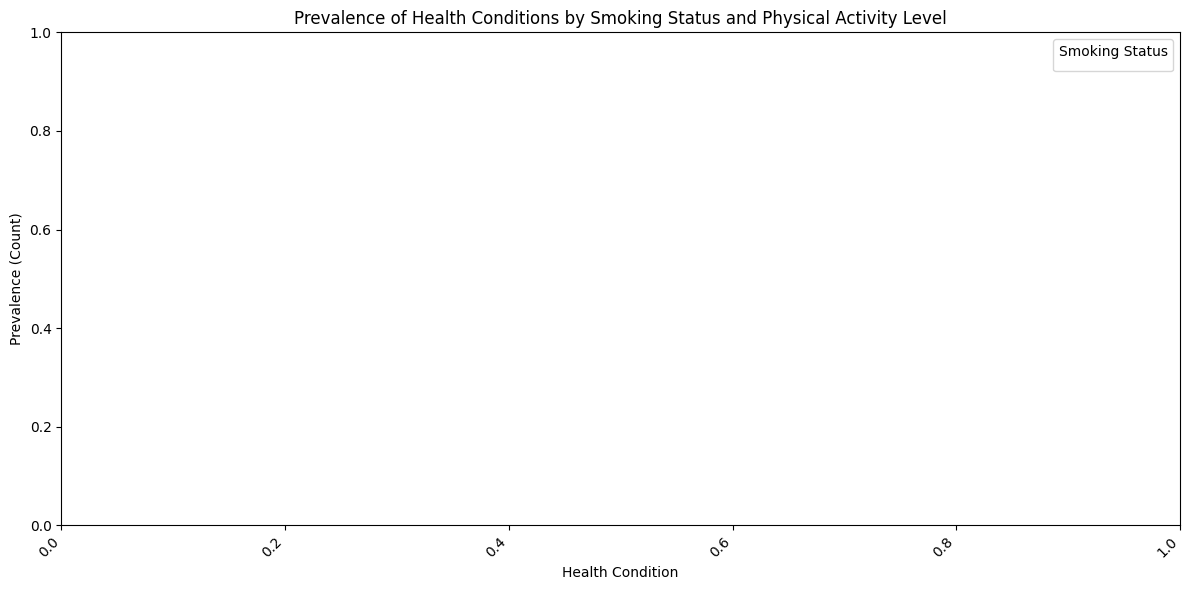

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocess data to focus on "Yes" values for the health conditions and lifestyle factors
# Assuming you have 'SmokerStatus' (Current Smoker, Non-Smoker) and 'PhysicalActivity' (High, Low, etc.)
# You may need to filter or transform the columns accordingly
heart_analysis_filtered = heart_analysis[heart_analysis['SmokerStatus'].isin(['Current Smoker', 'Non-Smoker'])]

# We will focus on conditions like Diabetes and Heart Attack
conditions = ['HadDiabetes', 'HadHeartAttack']

# Melt the data to long format for easy plotting
df_melted = heart_analysis_filtered.melt(id_vars=['SmokerStatus', 'PhysicalActivities'],
                                         value_vars=conditions,
                                         var_name='Condition',
                                         value_name='HasCondition')

# Filter to include only rows where 'HasCondition' is 1 (indicating the condition is present)
df_melted = df_melted[df_melted['HasCondition'] == 1]

# Group by 'SmokerStatus', 'PhysicalActivities', and 'Condition' to get the count of each combination
condition_counts = df_melted.groupby(['SmokerStatus', 'PhysicalActivities', 'Condition']).size().reset_index(name='Count')

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=condition_counts,
            x='Condition',
            y='Count',
            hue='SmokerStatus',
            palette='Set2',
            ci=None,
            dodge=True)

# Customize plot for clarity
plt.title("Prevalence of Health Conditions by Smoking Status and Physical Activity Level")
plt.xlabel("Health Condition")
plt.ylabel("Prevalence (Count)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Smoking Status")
plt.tight_layout()

# Show the plot
plt.show()